# 测试相位响应曲线

`\snnpy\models\utils\PRC.py`

In [1]:
import os
import sys
sys.path.append(r"../")
from utils.PRC import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1) 

## 测试 "相位漂移" 和 "相位响应曲线" 所使用的输入脉冲

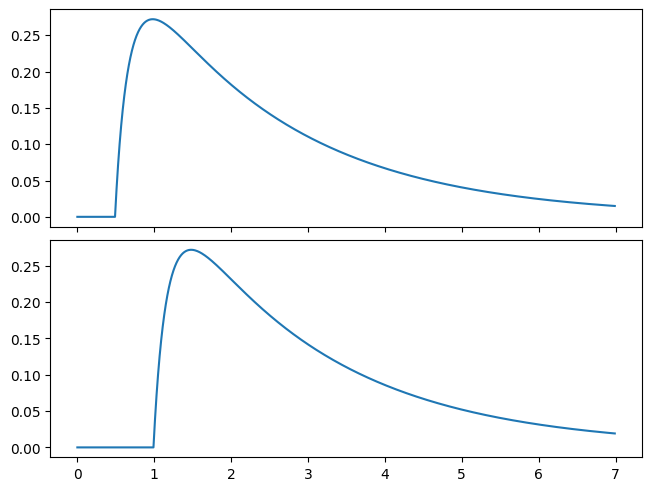

In [3]:
dt = 0.01
syn_test = syn_chem(2, dt=dt)
# print(syn.tau_d_q)
s_list = []
s1_list = []

n = 700
t_list = np.arange(0, n*dt, 0.01)
for i in range(n):
    t = i * dt
    syn_test(t, ts=[0.5, 1.])
    s_list.append(syn_test.s[0])
    s1_list.append(syn_test.s[1])

fig, axs = plt.subplots(2, sharex="all", layout='constrained')
axs[0].plot(t_list, s_list)
axs[1].plot(t_list, s1_list)
plt.show()

## 测试 "相位漂移" 和 "相位响应曲线" 
## HH

[-0.10184552  0.11619959]


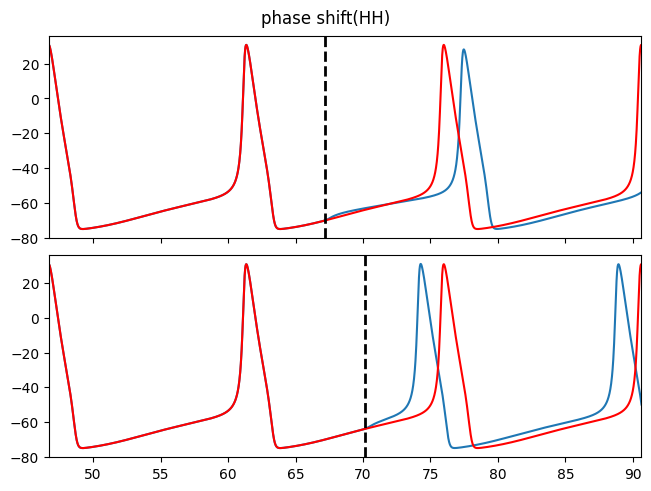

In [4]:
# ============== 相位漂移 HH ==============
from nodes.HH import HH
node = HH()
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.4, 0.6])
phi_shift.g_syn = 0.2
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(HH)")
print(prc)

In [5]:
# phi_shift.nodes.mem
# phi_shift.nodes.num
# phi_shift.num
# phi_shift.nodes.retuen_vars()
# phi_shift.nodes.t
# print(phi_shift.T_spike_list)
# phi_shift.ts_list
# plt.plot(phi_shift.mem_no_in)
# print(phi_shift.T_spike_act_list)

# plt.plot(phi_shift.mem_in[:, :])
# # plt.plot(phi_shift.mem_in[:, 1])
# plt.plot(phi_shift.mem_no_in, color="r")
# plt.xlim(5000, 9000)
# # phi_shift.mem_in
# plt.plot(phi_shift.I_in)
# plt.xlim(5000, 9000)

Text(0.5, 0.98, 'Phase Response Curves(HH)')

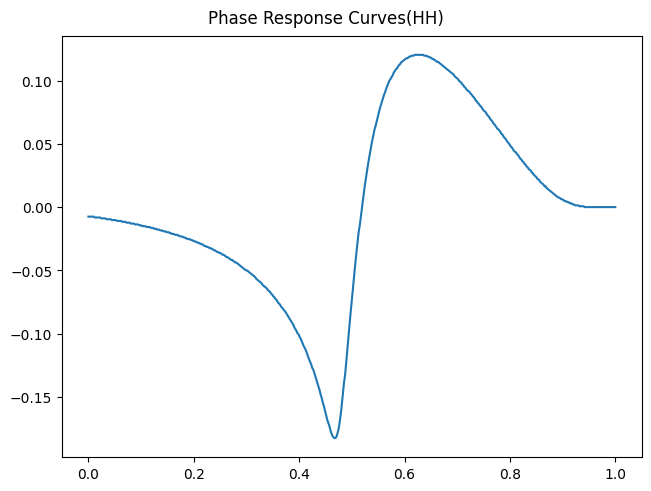

In [6]:
# ============== 相位响应曲线 HH ==============
node = HH()
PRCer = Phase_Response_Curves(node)
PRCer.g_syn = 0.2
prc = PRCer()
# prc = PRCer.return_PRC()
PRCer.plot_PRC()
fig = plt.gcf()
fig.suptitle("Phase Response Curves(HH)")
# PRCer.T_spike_list
# PRCer.ts_list
# PRCer.in_phase
# PRCer.T_spike_act_list

## RTM_HH

[0.06672692 0.33062208]


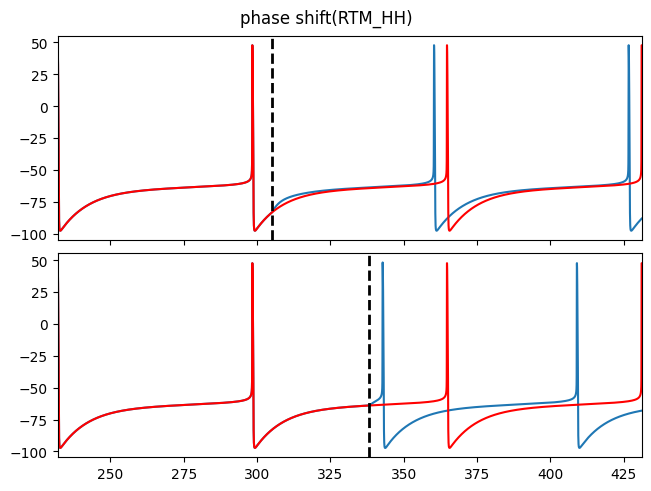

In [7]:
# ============== 相位漂移 RTM_HH ==============
from nodes.RTM_HH import RTM_HH
node = RTM_HH()
node.Iex = 0.3
phi_shift = phase_shift(node, phase=[0.1, 0.6])
phi_shift.g_syn = 0.1
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(RTM_HH)")
print(prc)

Text(0.5, 0.98, 'Phase Response Curves(RTM_HH)')

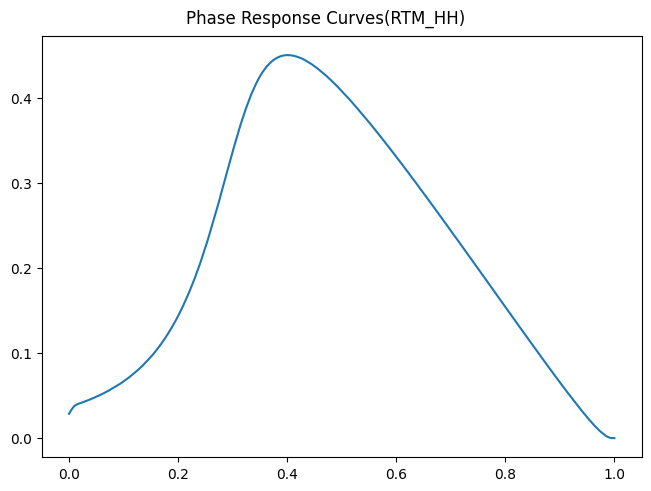

In [8]:
# ============== 相位响应曲线 RTM_HH ==============
node = RTM_HH()
node.Iex = 0.3
PRCer = Phase_Response_Curves(node)
PRCer.g_syn = 0.1
prc = PRCer()
# prc = PRCer.return_PRC()
PRCer.plot_PRC()
fig = plt.gcf()
fig.suptitle("Phase Response Curves(RTM_HH)")

## HR

[-0.10569272 -0.005101  ]


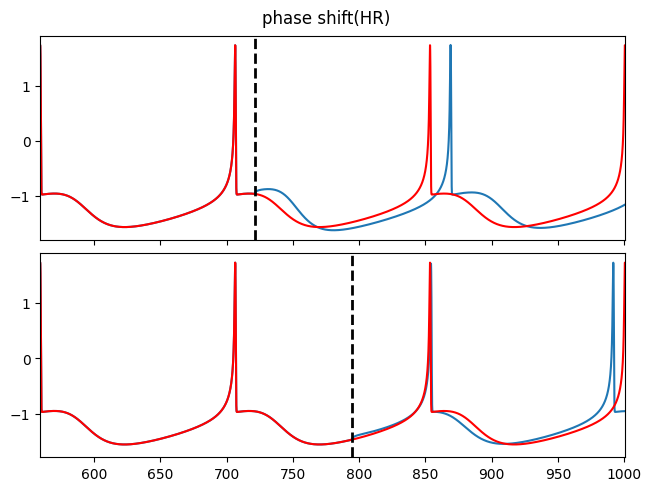

In [9]:
# ============== 相位漂移 HR ==============
g_syn = 1.0
from nodes.HR import HR
node = HR()
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.1, 0.6])
phi_shift.g_syn = g_syn
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(HR)")
print(prc)

Text(0.5, 0.98, 'Phase Response Curves(HR)')

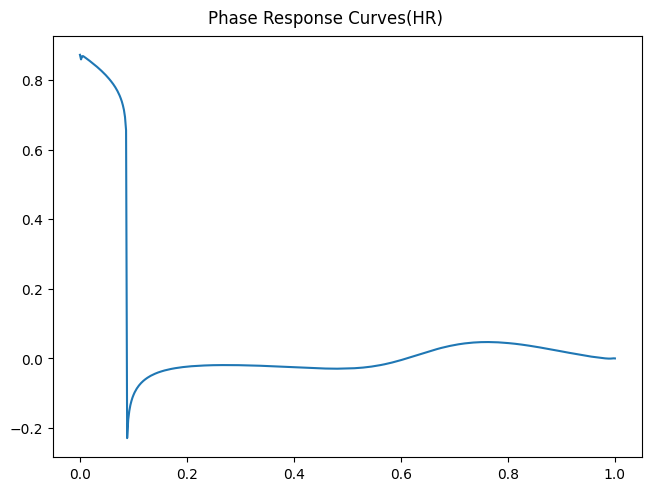

In [10]:
# ============== 相位响应曲线 HR ==============
node = HR()
PRCer = Phase_Response_Curves(node)
PRCer.g_syn = g_syn
prc = PRCer()
# prc = PRCer.return_PRC()
PRCer.plot_PRC()
fig = plt.gcf()
fig.suptitle("Phase Response Curves(HR)")

## WB_Inh

[0.43642184 0.27707629]


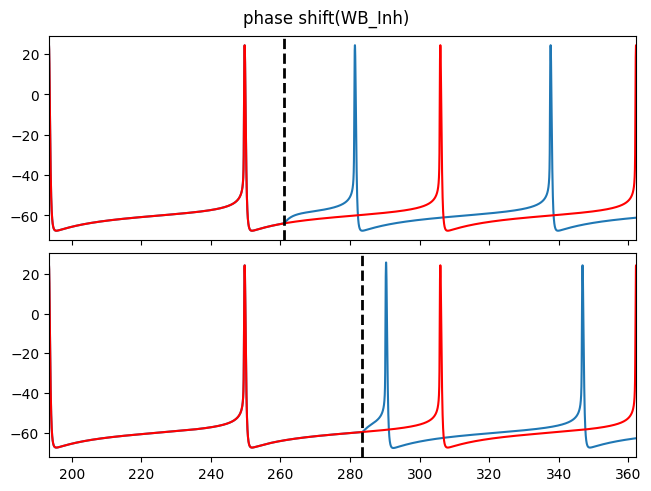

In [11]:
# ============== 相位漂移 WB_Inh ==============
g_syn = 0.1
from nodes.WB_Inh import WB_Inh
node = WB_Inh()
node.Iex = 0.3
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.2, 0.6])
phi_shift.g_syn = g_syn
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(WB_Inh)")
print(prc)

In [12]:
# print(phi_shift.T)
# print(phi_shift.ts_list)
# print(phi_shift.T_spike_list[5])
# print(phi_shift.T_spike_act_list[:, 5])
# 1 - phi_shift.in_phase - (phi_shift.T_spike_act_list[:, 5] - phi_shift.ts_list) / phi_shift.T

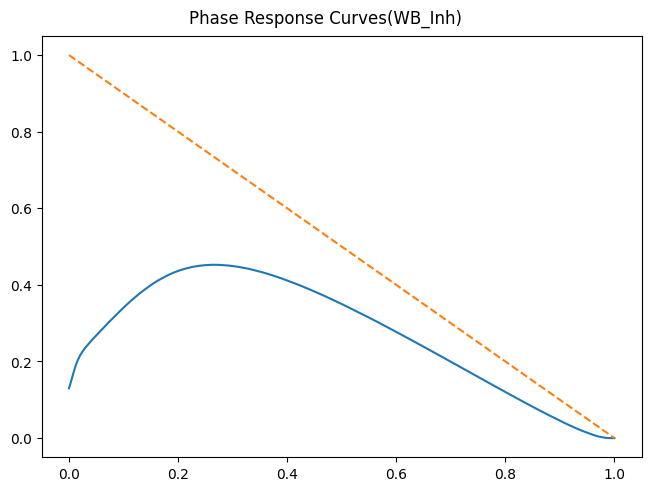

In [13]:
# ============== 相位响应曲线 WB_Inh ==============
method = "euler"  # （"euler", "rk4"）
node = WB_Inh(method=method)
node.Iex = 0.3
PRCer = Phase_Response_Curves(node, method=method)
PRCer.g_syn = g_syn
prc = PRCer()
# prc = PRCer.return_PRC()
PRCer.plot_PRC()
fig = plt.gcf()
fig.suptitle("Phase Response Curves(WB_Inh)")
ax = fig.gca()
ax.plot(PRCer.in_phase, 1-PRCer.in_phase, linestyle='--')

## FHN

[-0.01117166  0.12152589]


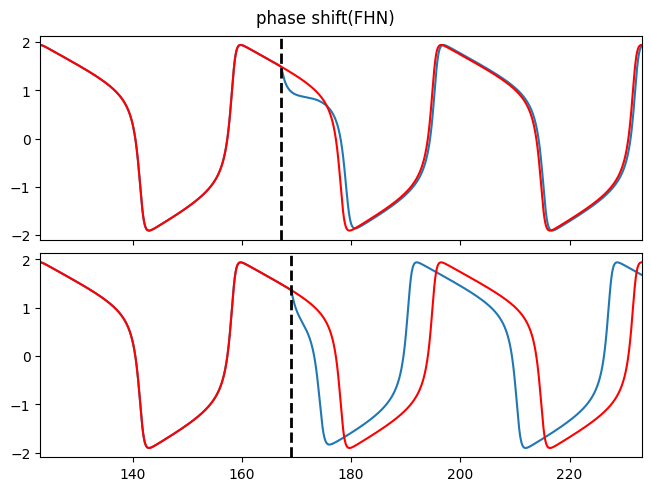

In [14]:
# ============== 相位漂移 FHN ==============
g_syn = 1.5
from nodes.FHN import FHN
node = FHN()
# node.Iex = 0.3
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.2, 0.25])
phi_shift.g_syn = g_syn
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(FHN)")
print(prc)

Text(0.5, 0.98, 'Phase Response Curves(FHN)')

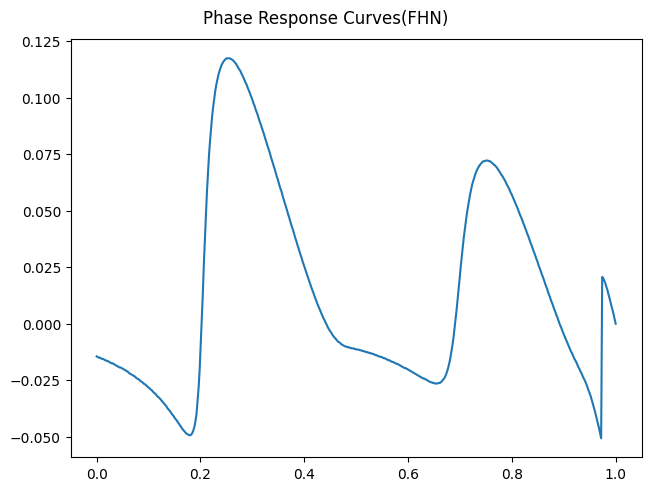

In [15]:
# ============== 相位响应曲线 WB_Inh ==============
method = "euler"  # （"euler", "rk4"）
node = FHN(method=method)
# node.Iex = 0.3
PRCer = Phase_Response_Curves(node, method=method)
PRCer.g_syn = g_syn
prc = PRCer()
# prc = PRCer.return_PRC()
PRCer.plot_PRC()
fig = plt.gcf()
fig.suptitle("Phase Response Curves(FHN)")
# ax = fig.gca()
# ax.plot(PRCer.in_phase, 1-PRCer.in_phase, linestyle='--')

## ML

[0.37054409 0.28764071]


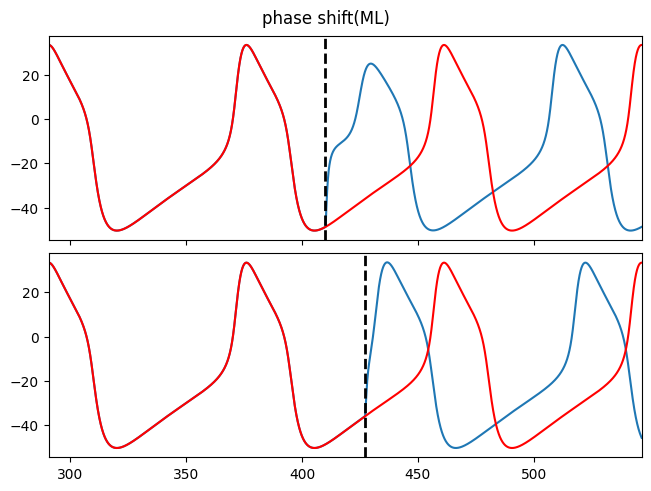

In [12]:
# ============== 相位漂移 ML ==============
g_syn = 50.
from nodes.ML import ML
node = ML()
# node.Iex = 0.3
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.4, 0.6])
phi_shift.g_syn = g_syn
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(ML)")
print(prc)

Text(0.5, 0.98, 'Phase Response Curves(ML)')

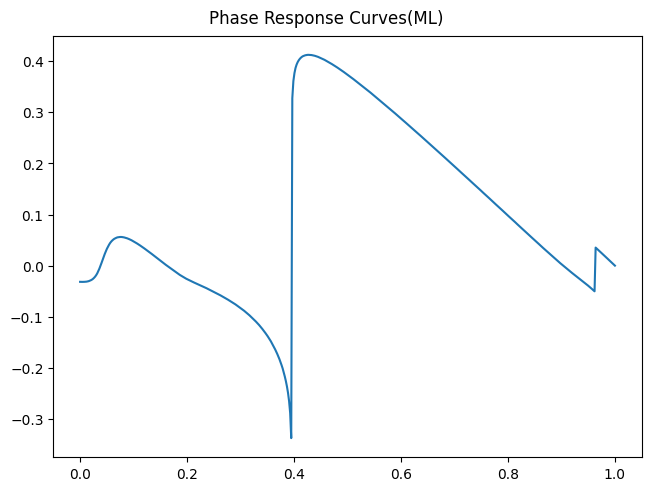

In [11]:
# ============== 相位响应曲线 ML ==============
method = "euler"  # （"euler", "rk4"）
node = ML(method=method)
# node.Iex = 0.3
PRCer = Phase_Response_Curves(node, method=method)
PRCer.g_syn = g_syn
prc = PRCer()
# prc = PRCer.return_PRC()
PRCer.plot_PRC()
fig = plt.gcf()
fig.suptitle("Phase Response Curves(ML)")
# ax = fig.gca()
# ax.plot(PRCer.in_phase, 1-PRCer.in_phase, linestyle='--')

## Erisir models

[0.04949875 0.16165414]


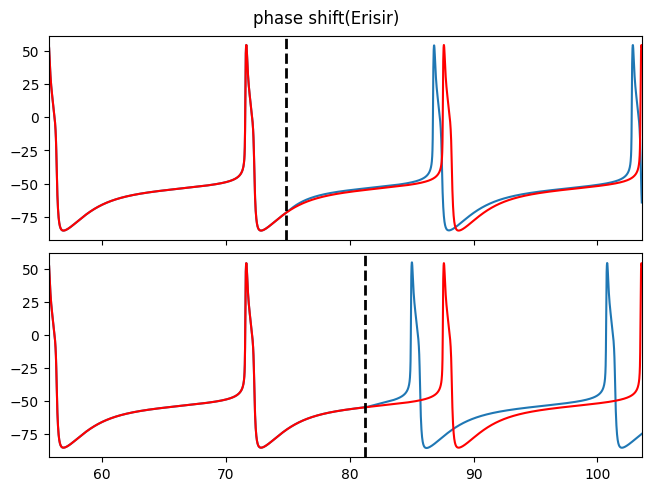

In [7]:
# ============== 相位漂移 Erisir ==============
g_syn = 0.1
from nodes.Erisir import Erisir
node = Erisir()
node.Iex = 7.0
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.2, 0.6])
phi_shift.g_syn = g_syn
prc = phi_shift()
phi_shift.plot_phase_shift()
fig = plt.gcf()
fig.suptitle("phase shift(Erisir)")
print(prc)

Text(0.5, 0.98, 'Phase Response Curves(Erisir)')

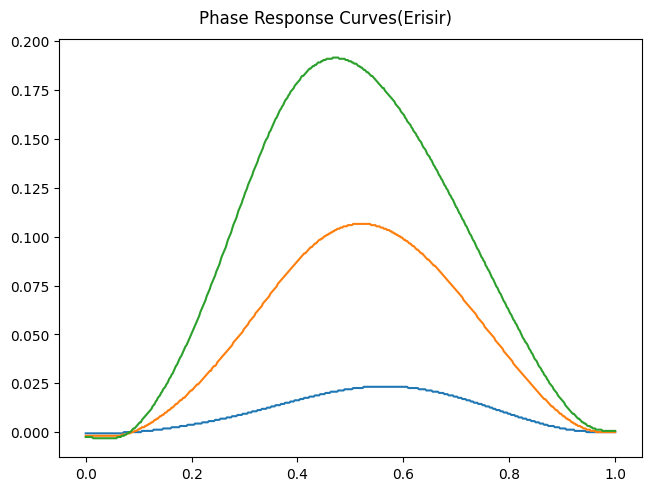

In [8]:
# ============== 相位响应曲线 Erisir ==============
method = "euler"  # （"euler", "rk4"）
node = Erisir(method=method)
node.Iex = 7
g_syn = 0.01
PRCer1 = Phase_Response_Curves(node, method=method)
PRCer1.g_syn = g_syn
prc = PRCer1()
# prc = PRCer.return_PRC()
# PRCer1.plot_PRC()

node = Erisir(method=method)
node.Iex = 7
g_syn = 0.05
PRCer2 = Phase_Response_Curves(node, method=method)
PRCer2.g_syn = g_syn
prc = PRCer2()
# prc = PRCer.return_PRC()
# PRCer2.plot_PRC()

node = Erisir(method=method)
node.Iex = 7
g_syn = 0.1
PRCer3 = Phase_Response_Curves(node, method=method)
PRCer3.g_syn = g_syn
prc = PRCer3()
# prc = PRCer.return_PRC()
# PRCer3.plot_PRC()

fig, axs = plt.subplots(1, layout='constrained')
axs.plot(PRCer1.in_phase, PRCer1.PRC)
axs.plot(PRCer2.in_phase, PRCer2.PRC)
axs.plot(PRCer3.in_phase, PRCer3.PRC)
fig = plt.gcf()
fig.suptitle("Phase Response Curves(Erisir)")